<a href="https://colab.research.google.com/github/bhuvantare2-cmd/quantum-circuit-simulations/blob/main/Quantum_Circuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Quantum circuits

In [1]:
# required libraries
! pip install qiskit
! pip install matplotlib
! pip install pylatexenc
! pip install scipy
! pip install numpy
! pip install qiskit_aer
! pip install qiskit_algorithms
! pip install qiskit_ibm_provider
! pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=ae2691008c20cd9e9653b0b4adda835d53317e6b0d5613f442f644e6c29ac17b
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.8/327.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

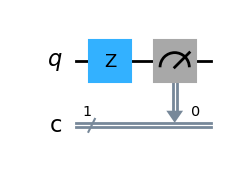

In [2]:
# Circuit with 1 qubit and 1 classical bit
from qiskit import QuantumCircuit
qc = QuantumCircuit(1, 1)

# Applying a Hadamard gate to create a superposition: (|0⟩ + |1⟩)/√2 - 50%
qc.z(0)

# Measure the qubit
qc.measure(0, 0)

# Draw the circuit
qc.draw('mpl')


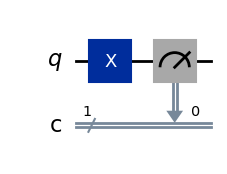

In [3]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(1,1)
qc.x(0)          # put qubit in superposition
qc.measure(0,0)
qc.draw('mpl')

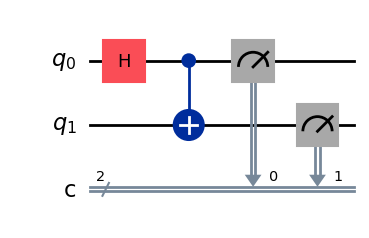

In [4]:
qc = QuantumCircuit(2,2)
qc.h(0)          # create superposition
qc.cx(0,1)       # entangle qubits
qc.measure([0,1],[0,1])
qc.draw('mpl')

**Circuit Addition **

Quantum Circuit:


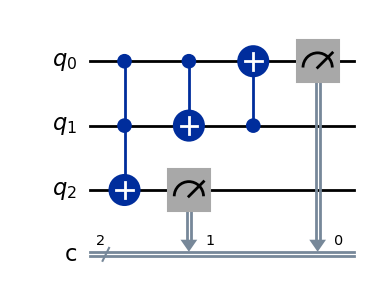


Measurement Counts: {'00': 1024}

Input: a=0, b=0
SUM   = 0
CARRY = 0
----------------------------------
Quantum Circuit:


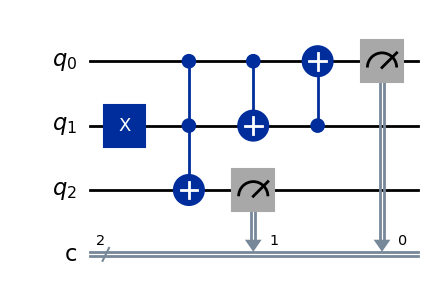


Measurement Counts: {'01': 1024}

Input: a=0, b=1
SUM   = 1
CARRY = 0
----------------------------------
Quantum Circuit:


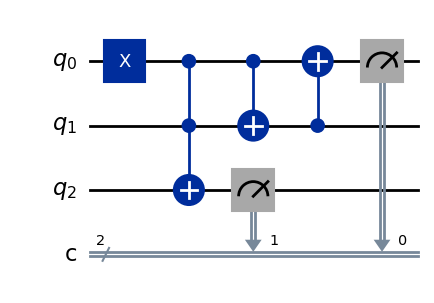


Measurement Counts: {'00': 1024}

Input: a=1, b=0
SUM   = 0
CARRY = 0
----------------------------------
Quantum Circuit:


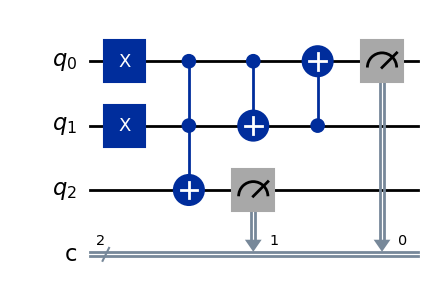


Measurement Counts: {'11': 1024}

Input: a=1, b=1
SUM   = 1
CARRY = 1
----------------------------------


In [5]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

def one_bit_adder(a, b):
    # 3 qubits, 2 classical bits
    qc = QuantumCircuit(3, 2)

    # Loading inputs a and b using X gate
    if a == 1:
        qc.x(0)     # q0 = a
    if b == 1:
        qc.x(1)     # q1 = b

    # Compute CARRY = a AND b using CCNOT
    qc.ccx(0, 1, 2)

    # Compute SUM = a XOR b using two CNOTs
    qc.cx(0, 1)
    qc.cx(1, 0)

    # Measuring SUM (q0) and CARRY (q2)
    qc.measure(0, 0)   # sum
    qc.measure(2, 1)   # carry

    # Drawing the circuit using 'mpl' backend
    print("Quantum Circuit:")
    display(qc.draw('mpl'))

    # Simulating the circuit to get results
    simulator = AerSimulator()
    job = simulator.run(qc, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)

    print("\nMeasurement Counts:", counts)

    # The classical bits are ordered as c[1]c[0], where c[1] is carry and c[0] is sum
    # The most frequent outcome is assumed for classical results
    # Example: {'00': 1024} means sum=0, carry=0
    # Example: {'01': 1024} means sum=1, carry=0
    # Example: {'10': 1024} means sum=0, carry=1

    # Get the most common outcome
    most_common_outcome = max(counts, key=counts.get)

    # Extract SUM and CARRY from the most common outcome string
    # Qiskit's counts format is usually 'c[n-1] ... c[1]c[0]', so for 2 bits, it's 'c1 c0'
    # where c1 is the bit from c[1] (carry) and c0 is the bit from c[0] (sum)
    carry_result = int(most_common_outcome[0]) # First bit is the result of classical bit 1 (carry)
    sum_result = int(most_common_outcome[1])   # Second bit is the result of classical bit 0 (sum)

    print(f"\nInput: a={a}, b={b}")
    print(f"SUM   = {sum_result}")
    print(f"CARRY = {carry_result}")
    print("----------------------------------")

# Test all input combinations
one_bit_adder(0,0)
one_bit_adder(0,1)
one_bit_adder(1,0)
one_bit_adder(1,1)

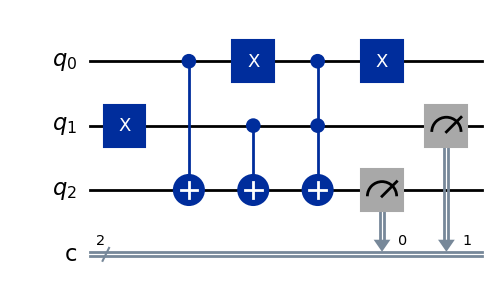

In [6]:
#from qiskit import QuantumCircuit, transpile
#from qiskit_ibm_provider import IBMProvider

# Create a quantum circuit with 3 qubits and 2 classical bits
qc = QuantumCircuit(3, 2)

# Set inputs (example: a=0, b=1)
a = 0
b = 1
if a == 1:
    qc.x(0)  # Set qubit q0 = a
if b == 1:
    qc.x(1)  # Set qubit q1 = b

# Step 1: Difference = a XOR b
qc.cx(0, 2)
qc.cx(1, 2)

# Step 2: Borrow = b AND (NOT a)
qc.x(0)          # NOT a
qc.ccx(0, 1, 2)  # Toffoli: controls = NOT a & b, target = q2
qc.x(0)          # Restore a

# Step 3: Measure
qc.measure(2, 0)  # difference
qc.measure(1, 1)  # borrow (for demonstration)

# Draw the circuit
display(qc.draw('mpl'))

Subtraction

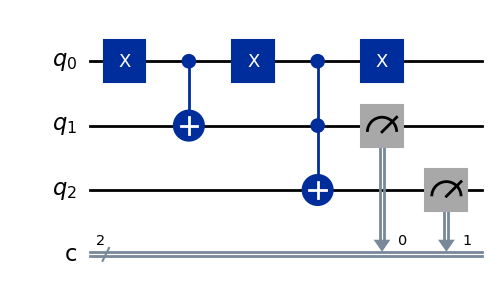

In [7]:
from qiskit import QuantumCircuit

# q0 = A, q1 = B, q2 = Borrow
qc = QuantumCircuit(3, 2)

# Example input: A=1, B=0
qc.x(0)   # Set A = 1
# qc.x(1) # Uncomment to set B = 1

# DIFFERENCE = A XOR B -> store in B
qc.cx(0, 1)

# BORROW = NOT(A) AND B -> store in q2
qc.x(0)          # Make A = NOT(A)
qc.ccx(0, 1, 2)  # Borrow
qc.x(0)          # Undo the NOT on A

# Measure Difference (B) and Borrow (q2)
qc.measure(1, 0)
qc.measure(2, 1)

display(qc.draw('mpl'))